## 기본 연산

심파이에서 표현식을 조작하는데 필요한 가장 기본적인 연산을 다룬다.
고급 연산에 대해서는 [advanced expression manipulation](http://docs.sympy.org/latest/tutorial/manipulation.html#tutorial-manipulation)절에서 다뤄진다.

In [11]:
from sympy import *
init_printing(use_unicode=True)
x, y, z = symbols('x y z')

### 대입

수학 표현식으로 수행하고자 하는 가장 일반적인 것중 하나가 대입이다.
대입은 표현식의 어떤 인스턴스를 다른 어떤 것으로 바꾼다. 
`subs` 메쏘드를 사용해서 이런 작업을 수행한다. 예를 들어:

In [12]:
expr = cos(x) + 1
expr.subs(x, y)

대입은 다음 두가지 중 한가지 이유 때문에 이루어진다:

1. 특정 지점에 표현식을 평가한다.
예를 들어, 표현식이 `cos(x) + 1`이고, `x = 0` 지점에서 평가하고자 하는 경우, `cos(0) + 1`은 2가 된다.

In [13]:
expr.subs(x, 0)

2. 하위 표현식을 또다른 하위 표현식으로 교체한다.
이런 작업을 수행하는 이유가 두가지 있다.
첫번째로 어떤 대칭을 갖는 표현식을 만들어 내는 경우다. 예를 들어, $x^{x^{x^{x}}}$.
이것을 만들어 내려면, `x**y`로 시작해서 `y`를 `x**y`로 치환한다.
그러고 나면, `x**(x**y)`를 얻게 된다.
새로운 표현식의 `y`를 `x**x`로 치환하면, `x**(x**(x**x))`를 얻게되는데, 기대했던 표현식이 바로 이것이다.

In [14]:
expr = x ** y
expr

In [15]:
expr = expr.subs(y, x**y)
expr

In [16]:
expr = expr.subs(y, x**x)
expr

두번째 경우는 매우 제어된 단순화를 수행하고자 하거나 아마도 심파이에서 다른 방법으로 잘 되지 않는 경우가 이에 해당된다.
예를 들어, $sin(2x) + cos(2x)$ 표현식이 있는데, $sin(2x)$를 $2sin(x)cos(x)$로 치환하고자 한다고 가정하자.
나중에 배우게 되겠지만, `expand_trig` 함수가 이런 작업을 수행하는 역할을 한다.
하지만, 이 함수는 $cos(2x)$를 전개도 함께 하는데, 이는 원하는 바가 아니다.
이와 같은 정교한 단순화를 수행하는 방법이 있고, [advanced expression manipulation](http://docs.sympy.org/latest/tutorial/manipulation.html#tutorial-manipulation)절에서 일부 학습을 하겠지만, 
쉬운 방법이 $sin(2x)$를 $2sin(x)cos(x)$로 치환하는 것이다.

In [17]:
expr = sin(2*x) + cos(2*x)
expand_trig(expr)

In [18]:
expr.subs(sin(2*x), 2*sin(x)*cos(x))

`subs` 메쏘드에 관해 주목할 점이 두가지 있다. 먼저 `subs` 메쏘드는 새로운 표현식을 반환한다.
심파이 객체는 변경할 수 없다(immutable). `subs` 메쏘드는 결정된 곳에는 변경할 수 없음을 의미한다. 예를 들어:

In [19]:
expr = cos(x)
expr.subs(x, 0)

In [20]:
expr

In [21]:
x

`expr.subs(x, 0)` 표현식을 실행하면 `expr`은 변경되지 않는 것을 알게 된다.
사실, 심파이 표현식은 변경될 수 없기 때문에, 어떤 함수도 결정된 것을 변경하지 못한다.
모든 함수는 새로운 표현식을 반환한다.

> ### 급 조언 {.callout}
>
> 심파이 표현식은 변경할 수 없다. 어떤 함수도 결정된 것을 변경하지 못한다.

다수 치환을 한번에 수행하려면, `(old, new)` 짝꿍 리스트를 `subs` 메쏘드에 전달한다.

In [22]:
expr = x ** 3 + 4*x*y - z
expr.subs([(x,2), (y,4), (z,0)])

한번에 유사한 대량 치환을 수행하는데 **[list comprehension](https://en.wikipedia.org/wiki/List_comprehension)** 과 조합하는 것이 유용하다.
예를 들어, $x^4 - 4x^3 + 4x^2 - 2x +3$이 있는데 모든 $x$ 인스턴스를 짝수 멱승을 갖는 $y$로 바꿔서 $y^4 - 4x^3 + 4y^2 - 2x +3$을 얻는다고 하자.

In [24]:
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

## 문자열을 심파이 표현식으로 변환

`sympify` 함수를 사용해서 문자열을 심파이 표현식으로 변환한다. (`sympify`로 `simplify`와 혼동하지 않는다.)

예를 들어:

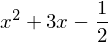

In [25]:
str_expr = 'x**2 + 3*x - 1/2'
expr = sympify(str_expr)
expr

In [26]:
expr.subs(x,2)

> ### 경고: `sympify`는 `eval`을 사용한다. 정제되지 않는 입력값에 사용하지 마라!

### evalf

수치 표현식을 부동소수점 숫자로 평가하는데, `evalf` 메쏘드를 사용한다.

In [27]:
expr = sqrt(8)
expr.evalf()

심파이를 사용해서 임의 정밀도를 갖도록 표현식을 평가할 수 있다.
기본디폴트 설정으로 15자리 정밀도가 사용되지만, `evalf` 함수에 인자로 임의 숫자를 넘길 수도 있다.
$\pi$에 대해 100자리 정밀도로 계산해 보자.

In [28]:
pi.evalf(100)

수치적으로 해당 지점에 기호를 갖는 표현식을 평가하려면, `subs` 다음에 `evalf` 메쏘드를 사용한다.
하지만 `subs` 플래그(`Symbol: point` 짝꿍 딕셔너리)를 사용해서 `evalf` 메쏘드에 치환을 전달하는 것이 수치적으로 안정성이 높고 더 효율적이다.

In [29]:
expr = cos(2*x)
expr.evalf(subs={x: 2.4})

종종 표현식이 평가된 뒤에 남은 정도보다 더 적은 반올림 오차가 있는 경우가 있다.
그런 숫자는 `chop` 플래그를 `True`로 설정해서 사용자의 판단하에 제거할 수도 있다.

In [30]:
one = cos(1)**2 + sin(1)**2
(one -1).evalf()

In [31]:
(one - 1).evalf(chop=True)

### lambdify

`subs`와 `evalf`메쏘드는 간단한 평가를 수행할 때 좋지만, 다수 지점에서 표현식을 평가할 경우에는 좀더 효율적인 방식이 존재한다.
예를 들어, 수천개 지점에서 표현식을 평가하고자 한다면, 심파이를 사용하게 되면 필요로 하는 것보다 훨씬더 느리게 된다. 특히, 컴퓨터 정밀도에 대해 관여를 하는 경우 더욱 그렇다. 대신에 [NumPy](http://www.numpy.org/)와 [SciPy](http://www.scipy.org/) 같은 라이브러리를 사용한다.

심파이 표현식을 수치적으로 평가되는 표현식으로 변환하는 가장 쉬운 방식이 `lambdify` 함수를 사용하는 것이다.
`lambdify` 함수는 `lambda` 함수처럼 동작한다. 차이점은 심파이 명칭을 해당 수치 라이브러리, 보통 넘파이 명칭으로 변환하는 것이 다르다. 예를 들어:

In [33]:
import numpy
a = numpy.arange(10)
expr = sin(x)
f = lambdify(x, expr, "numpy")
f(a)

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

넘파이가 아닌 다른 라이브러리를 사용할 수도 있다. 예를 들어, 표준 수학 라이브러리를 사용하는 경우, `math`를 사용한다.

In [34]:
f = lambdify(x, expr, "math")
f(0.1)

심파이가 알지 못하는 수치 라이브러리를 `lambdify`로 사용하는 경우, `sympy_name:numerical_function` 딕셔너리 쌍으로 전달한다. 예를 들어:

In [35]:
def mysin(x):
    """
    내가 정의한 사인 함수. 작은 x 값에만 정확하게 계산된다.
    """
    return x

f = lambdify(x, expr, {"sin":mysin})
f(0.1)